# Dimension Reduction


The notebook is to facilitate discussion on dimension reduction.



---



## Part I: Principal Components 

In [1]:
# Import necessary libraries
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error

import ssl
ssl._create_default_https_context = ssl._create_stdlib_context

#### Retrieve Data

FRED-MD: A Monthly Database for Macroeconomic Research 
See McCracken & Ng (2016).

In [2]:
# Define the FRED path and local file path for the data
fred_path = "https://files.stlouisfed.org/files/htdocs/fred-md/monthly/current.csv"
local_file_path = Path("data/current.csv")

# Load data from the local file if it exists; otherwise, load from FRED
if local_file_path.is_file():
    print("Local file found")
    df = pd.read_csv('data/current.csv')
else:
    print("Be patient: loading from FRED (2 minutes)")
    df = pd.read_csv(fred_path)
    print("Done")
    
df.drop(0, inplace=True)

# Set the index to the date column and convert to datetime
df = df.set_index("sasdate", drop=True)
df.index = pd.to_datetime(df.index, format='%m/%d/%Y')

# Preview the first few rows of the DataFrame
df.head()

Be patient: loading from FRED (2 minutes)
Done


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9616,23.3868,22.2620,31.6664,18.9498,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1959-02-01,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3917,23.7024,22.4549,31.8987,19.0492,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
1959-03-01,2610.396,2452.7,15.491,277775.2539,18523.05762,22.7142,23.8459,22.5651,31.8987,19.4223,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
1959-04-01,2627.446,2470.0,15.435,283362.7075,18534.46600,23.1981,24.1903,22.8957,32.4019,19.5466,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
1959-05-01,2642.720,2486.4,15.622,285307.2201,18679.66354,23.5476,24.3911,23.1161,32.5567,19.9445,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


#### Standardize the Data

In [3]:
df.dropna(inplace=True)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled.dropna(inplace=True)

# Preview the first few rows of the DataFrame
df_scaled.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1992-02-01,-1.635222,-1.726698,-1.741535,-2.054920,-1.491889,-2.636445,-2.885924,-2.857011,-3.022050,-2.724210,...,-1.460756,-1.538975,-1.504447,-1.447862,-1.551766,-1.275631,-1.523609,-1.960475,-1.177048,-0.339920
1992-03-01,-1.631427,-1.724947,-1.736853,-2.041591,-1.495383,-2.590424,-2.820313,-2.792400,-2.911456,-2.631883,...,-1.449466,-1.531185,-1.498348,-1.432243,-1.546929,-0.737923,-1.532682,-1.955582,-1.173172,-0.441830
1992-04-01,-1.622119,-1.717294,-1.734719,-2.019433,-1.488366,-2.548067,-2.761366,-2.736782,-2.794184,-2.546170,...,-1.447694,-1.521284,-1.490216,-1.430507,-1.537256,-0.648306,-1.521802,-1.955480,-1.168525,-0.446041
1992-05-01,-1.608599,-1.701336,-1.721452,-2.048554,-1.481953,-2.529794,-2.717307,-2.692900,-2.711293,-2.398955,...,-1.441655,-1.518168,-1.488183,-1.430507,-1.530001,-0.498942,-1.539271,-1.955207,-1.161614,-0.625842
1992-06-01,-1.597946,-1.688390,-1.714479,-2.013577,-1.478650,-2.526650,-2.737056,-2.716489,-2.773608,-2.465780,...,-1.421307,-1.514349,-1.480050,-1.411417,-1.525165,-0.409324,-1.532437,-1.947651,-1.155113,-0.622752


#### Estimating the Principal Components

In [4]:
pca = PCA(n_components=10, whiten=True, svd_solver='full', random_state=42)
pca.fit(df_scaled)

PCA(n_components=10, random_state=42, svd_solver='full', whiten=True)

#### Selecting the Number of Components

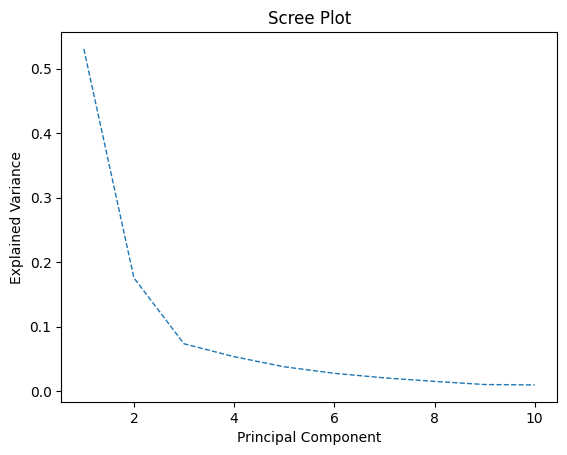

In [5]:
plt.figure()
plt.plot(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_, '--', linewidth=1)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

plt.show()

In [6]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Decide on the number of components (e.g., explaining 75% variance)
n_components = np.argmax(cumulative_variance >= 0.75) + 1
print(f'Number of components explaining 75% of the variance: {n_components}')

Number of components explaining 75% of the variance: 3


#### Estimated Components

In [7]:
pca_indices = pd.DataFrame(pca.transform(df_scaled), index=df_scaled.index)
pca_indices

,0,1,2,3,4,5,6,7,8,9
sasdate,,,,,,,,,,
1992-02-01,1.798346,1.031881,-1.614512,0.203441,0.740073,0.408105,-0.549021,0.846149,-0.871206,-2.513593
1992-03-01,1.791468,1.033248,-1.757776,0.410434,0.463781,1.043687,0.143397,0.893867,-0.847853,-1.720587
1992-04-01,1.754266,1.126540,-1.712258,0.209357,0.381348,0.857801,0.273108,0.756704,-0.707173,-1.619317
1992-05-01,1.765119,1.065536,-1.547180,0.105689,0.400113,0.504134,-0.376161,0.477347,-0.841974,-2.094509
1992-06-01,1.755728,1.158002,-1.569695,0.110184,0.475430,0.674088,-0.346296,0.631095,-0.837099,-1.791206
...,...,...,...,...,...,...,...,...,...,...
2024-02-01,-1.585713,-1.604895,-1.371439,-0.399930,1.910292,0.387213,-0.868055,-0.849631,-1.716183,-1.343963
2024-03-01,-1.616855,-1.454440,-1.514167,-0.738478,1.956814,0.234260,-0.513330,-0.923594,-1.746393,-0.765121
2024-04-01,-1.613147,-1.434705,-1.496967,-0.571314,2.114497,0.498401,-0.166034,-0.974889,-1.721083,-0.901098


#### Estimated Loadings -- Interpretation

In [8]:
pca_loadings = pd.DataFrame(pca.components_.T, index=df_scaled.columns.values)
pca_loadings

,0,1,2,3,4,5,6,7,8,9
RPI,-0.119062,-0.025895,-0.032642,0.033547,0.020909,-0.036248,-0.022384,0.029177,0.009965,0.036450
W875RX1,-0.119275,-0.036476,-0.019497,0.025066,0.016673,-0.034996,0.004998,0.024676,-0.006356,0.019904
DPCERA3M086SBEA,-0.120764,-0.024640,-0.015421,0.024656,0.015676,-0.004508,0.007119,0.011718,-0.036881,0.015115
CMRMTSPLx,-0.118395,-0.048383,0.016660,0.013501,-0.007836,-0.023612,0.001415,0.019621,-0.007060,0.025183
RETAILx,-0.116810,-0.041291,-0.062858,0.021371,0.026883,0.027326,-0.026735,-0.015066,-0.007988,-0.009124
...,...,...,...,...,...,...,...,...,...,...
UMCSENTx,0.054550,-0.093715,0.039581,-0.030306,-0.200547,-0.254219,0.054137,0.054859,-0.118212,0.202630
DTCOLNVHFNM,-0.116902,-0.028779,0.001027,0.039979,0.022250,0.075497,-0.033703,-0.016389,-0.040446,-0.086000
DTCTHFNM,-0.111025,0.009444,0.113216,0.005180,0.022143,0.079750,0.015536,0.004862,0.002453,-0.092240
INVEST,-0.113551,-0.026828,-0.096657,0.042945,0.021674,0.030043,-0.054654,-0.010511,0.032923,0.005380


Things to consider:
* Suggested data transformation `TCODE' should be applied for each series before fitting the model.
* Train-Test split to determine the stability of the PCs.
* Interpretability - Plot loading vectors, Sparse PCA, etc.



---



## PART II:  Forecasting - OLS, LASSO, PCA

#### Retrieve the data

In [9]:
# Define the FRED path and local file path for the data
fred_path = "https://files.stlouisfed.org/files/htdocs/fred-md/monthly/current.csv"
local_file_path = Path("data/current.csv")

# Load data from the local file if it exists; otherwise, load from FRED
if local_file_path.is_file():
    print("Local file found")
    df = pd.read_csv('data/current.csv')
else:
    print("Be patient: loading from FRED (2 minutes)")
    df = pd.read_csv(fred_path)
    print("Done")
    
df.drop(0, inplace=True)

# Set the index to the date column and convert to datetime
df = df.set_index("sasdate", drop=True)
df.index = pd.to_datetime(df.index, format='%m/%d/%Y')

# Preview the first few rows of the DataFrame
df.head()

Be patient: loading from FRED (2 minutes)
Done


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9616,23.3868,22.2620,31.6664,18.9498,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1959-02-01,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3917,23.7024,22.4549,31.8987,19.0492,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
1959-03-01,2610.396,2452.7,15.491,277775.2539,18523.05762,22.7142,23.8459,22.5651,31.8987,19.4223,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
1959-04-01,2627.446,2470.0,15.435,283362.7075,18534.46600,23.1981,24.1903,22.8957,32.4019,19.5466,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
1959-05-01,2642.720,2486.4,15.622,285307.2201,18679.66354,23.5476,24.3911,23.1161,32.5567,19.9445,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


#### Define the Target Variable (S&P 500 Returns)

In [10]:
df['Target'] = (np.log(df['S&P 500']/df['S&P 500'].shift(1)))                   # .shift(1)
df['Target'] = df['Target'].shift(periods=-1)
df.drop('S&P 500', axis=1, inplace=True)
df = df.apply(lambda x: x.fillna(x.rolling(window=6, min_periods=1).mean()))
df.dropna(inplace=True)
df

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx,Target
sasdate,,,,,,,,,,,,,,,,,,,,,
1992-02-01,8444.994,7290.1,49.123,718889.123,164213.0,61.9192,70.4258,68.6473,80.2867,57.8121,...,52.129,11.89,13.67,11.30,68.8,64066.000,189752.08,744.1547,17.0505,-0.012684
1992-03-01,8457.388,7294.4,49.213,721782.597,163721.0,62.4403,71.0155,69.2529,81.0021,58.9931,...,52.284,11.92,13.76,11.32,76.0,62992.000,190887.95,749.5423,16.2227,0.000123
1992-04-01,8487.783,7313.2,49.254,726592.639,164709.0,62.9199,71.5453,69.7742,81.7607,60.0895,...,52.481,11.96,13.77,11.36,77.2,64280.000,190911.80,756.0018,16.1885,0.018001
1992-05-01,8531.932,7352.4,49.509,720270.973,165612.0,63.1268,71.9413,70.1855,82.2969,61.9726,...,52.543,11.97,13.77,11.39,79.2,62212.000,190975.14,765.6078,14.7280,-0.015892
1992-06-01,8566.719,7384.2,49.643,727863.941,166077.0,63.1624,71.7638,69.9644,81.8938,61.1178,...,52.619,12.01,13.88,11.41,80.4,63021.000,192729.46,774.6433,14.7531,0.016470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,19933.933,16284.5,119.695,1543930.000,702681.0,102.4479,100.6019,100.7340,101.8697,106.1075,...,127.128,30.83,35.41,27.55,77.2,537931.830,924804.89,5162.2962,16.4023,0.023724
2024-05-01,20025.483,16366.3,120.279,1556511.000,704309.0,103.2156,101.0746,101.0392,102.2251,105.6747,...,127.326,30.93,35.47,27.65,69.1,542427.100,927303.15,5174.3603,12.8609,0.033788
2024-06-01,20052.066,16382.3,120.443,1564650.000,702350.0,103.2798,101.2769,101.0612,102.3131,105.3272,...,127.646,31.06,35.58,27.79,68.2,544655.880,926980.66,5237.0999,12.6826,0.022435


#### Creating training and test sets, standardizing the data

In [11]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

In [12]:
scaler = StandardScaler()
train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data), index=train_data.index, columns=train_data.columns)
test_data_scaled = pd.DataFrame(scaler.transform(test_data), index=test_data.index, columns=test_data.columns)

#### Estimate the PCA model

In [13]:
# Initialize PCA
pca = PCA(n_components=3, whiten=True, svd_solver='full')

# Fit PCA on the training data
pca.fit(train_data_scaled.drop("Target", axis=1))

# Transform both train and test sets
train_pca = pd.DataFrame(pca.transform(train_data_scaled.drop("Target", axis=1)), index=train_data_scaled.index)
test_pca = pd.DataFrame(pca.transform(test_data_scaled.drop("Target", axis=1)), index=test_data_scaled.index)

#### Forecasting Models

In [14]:

ols = LinearRegression(fit_intercept=True).fit(train_data_scaled.drop("Target", axis=1), train_data_scaled["Target"])
ols_pca = LinearRegression(fit_intercept=True).fit(train_pca, train_data_scaled["Target"])
lasso = Lasso(alpha=0.005, fit_intercept=True).fit(train_data_scaled.drop("Target", axis=1), train_data_scaled['Target'])

/Users/justincase/PycharmProjects/FINANCE 781/.venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.459e+00, tolerance: 3.120e-02
  model = cd_fast.enet_coordinate_descent(


In [15]:
ols_forecasts = ols.predict(test_data_scaled.drop("Target", axis=1))
ols_pca_forecasts = ols_pca.predict(test_pca)
lasso_forecasts = lasso.predict(test_data_scaled.drop("Target", axis=1))

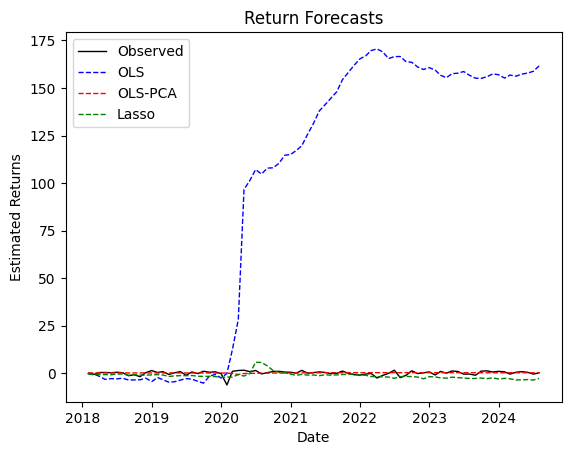

In [16]:
plt.figure()
plt.plot(test_data_scaled.index, test_data_scaled["Target"], linewidth=1, color='black', label='Observed')
plt.plot(test_data_scaled.index, ols_forecasts, '--', linewidth=1, color='blue', label='OLS')
plt.plot(test_data_scaled.index, ols_pca_forecasts, '--', linewidth=1, color='red', label='OLS-PCA')
plt.plot(test_data_scaled.index, lasso_forecasts, '--', linewidth=1, color='green', label='Lasso')
plt.title('Return Forecasts')
plt.xlabel('Date')
plt.ylabel('Estimated Returns')
plt.legend()

plt.show()

In [17]:
for i in [ols_forecasts, ols_pca_forecasts, lasso_forecasts]:
    print("MS and MA Errors:    ", mean_squared_error(test_data_scaled["Target"].values, i), "   ", mean_absolute_error(test_data_scaled["Target"].values, i))


MS and MA Errors:     14505.261515829137     98.08759418684708
MS and MA Errors:     1.3441993817498061     0.8055098416540306
MS and MA Errors:     5.476096524982476     1.9424514222376064


Things to consider:

* Suggested data transformation `TCODE' should be applied for each series before fitting the model.
* Expanding window / rolling window regressions to re-estimate the models on recent data. How many observations should the initial window contain? 
* Split the training data into training and validation subsets, to tune the Lasso lambda hyperparameter. What validation methodology should be used: simple holdout, cross-validation, etc.? What should the training-validation split be?
* Selection of optimal PCs in expanding window / rolling window regressions.
* etc.


## PART III: K-Means Clustering

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

#### Retrieve the Data

In [19]:
# Define the FRED path and local file path for the data
fred_path = "https://files.stlouisfed.org/files/htdocs/fred-md/monthly/current.csv"
local_file_path = Path("data/current.csv")

# Load data from the local file if it exists; otherwise, load from FRED
if local_file_path.is_file():
    print("Local file found")
    df = pd.read_csv('data/current.csv')
else:
    print("Be patient: loading from FRED (2 minutes)")
    df = pd.read_csv(fred_path)
    print("Done")
    
df.drop(0, inplace=True)

# Set the index to the date column and convert to datetime
df = df.set_index("sasdate", drop=True)
df.index = pd.to_datetime(df.index, format='%m/%d/%Y')

# Preview the first few rows of the DataFrame
df.head()

Be patient: loading from FRED (2 minutes)
Done


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9616,23.3868,22.2620,31.6664,18.9498,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1959-02-01,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3917,23.7024,22.4549,31.8987,19.0492,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
1959-03-01,2610.396,2452.7,15.491,277775.2539,18523.05762,22.7142,23.8459,22.5651,31.8987,19.4223,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
1959-04-01,2627.446,2470.0,15.435,283362.7075,18534.46600,23.1981,24.1903,22.8957,32.4019,19.5466,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
1959-05-01,2642.720,2486.4,15.622,285307.2201,18679.66354,23.5476,24.3911,23.1161,32.5567,19.9445,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


#### Standardize the Data

In [20]:
df.dropna(inplace=True)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled.dropna(inplace=True)

# Preview the first few rows of the DataFrame
df_scaled.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1992-02-01,-1.635222,-1.726698,-1.741535,-2.054920,-1.491889,-2.636445,-2.885924,-2.857011,-3.022050,-2.724210,...,-1.460756,-1.538975,-1.504447,-1.447862,-1.551766,-1.275631,-1.523609,-1.960475,-1.177048,-0.339920
1992-03-01,-1.631427,-1.724947,-1.736853,-2.041591,-1.495383,-2.590424,-2.820313,-2.792400,-2.911456,-2.631883,...,-1.449466,-1.531185,-1.498348,-1.432243,-1.546929,-0.737923,-1.532682,-1.955582,-1.173172,-0.441830
1992-04-01,-1.622119,-1.717294,-1.734719,-2.019433,-1.488366,-2.548067,-2.761366,-2.736782,-2.794184,-2.546170,...,-1.447694,-1.521284,-1.490216,-1.430507,-1.537256,-0.648306,-1.521802,-1.955480,-1.168525,-0.446041
1992-05-01,-1.608599,-1.701336,-1.721452,-2.048554,-1.481953,-2.529794,-2.717307,-2.692900,-2.711293,-2.398955,...,-1.441655,-1.518168,-1.488183,-1.430507,-1.530001,-0.498942,-1.539271,-1.955207,-1.161614,-0.625842
1992-06-01,-1.597946,-1.688390,-1.714479,-2.013577,-1.478650,-2.526650,-2.737056,-2.716489,-2.773608,-2.465780,...,-1.421307,-1.514349,-1.480050,-1.411417,-1.525165,-0.409324,-1.532437,-1.947651,-1.155113,-0.622752


#### K-Means Clustering

In [21]:
kmeans = KMeans(n_clusters=4, random_state=42)  # You can choose a different number of clusters
clusters = kmeans.fit_predict(df_scaled)

/Users/justincase/PycharmProjects/FINANCE 781/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[-4.82809793e-01 -4.09010037e-01 -4.47469743e-01 -2.72329360e-01
  -5.07820545e-01  9.35212967e-02  5.23171093e-01  3.68556973e-01
   8.79039256e-01  5.33454971e-01  9.91924874e-01 -3.26666964e-02
  -1.88858633e-01 -6.40513170e-02  1.07953040e+00  3.66757402e-01
  -2.39076012e-01 -4.87793174e-01  1.38962387e-01 -3.54917975e-01
  -1.23372204e-01 -3.80739131e-01 -2.59528851e-01 -4.47284605e-01
  -7.88262129e-01  1.95707235e-01 -2.30002020e-01 -5.91331490e-01
  -4.06434520e-01 -6.02393688e-01 -8.88068577e-02 -1.93803305e-01
   8.52218721e-01 -6.86525620e-01  4.40316334e-01  6.10211447e-01
   7.27156530e-01  4.31282907e-01 -3.11798293e-01 -3.04791334e-02
   3.17356360e-01  2.64806750e-01  4.34707716e-02 -1.17118122e-01
  -5.92860535e-01  3.60619349e-01 -5.07261617e-01  9.51932100e-01
   8.84791116e-01  9.37633252e-01  8.21180746e-01  9.05695641e-01
   9.42329365e-01  8.49810039e-01  9.99036291e-01  7.88211803e-01
   9.38753853e-01 -5.51516653e-01 -2.49178181e-01 -1.179524

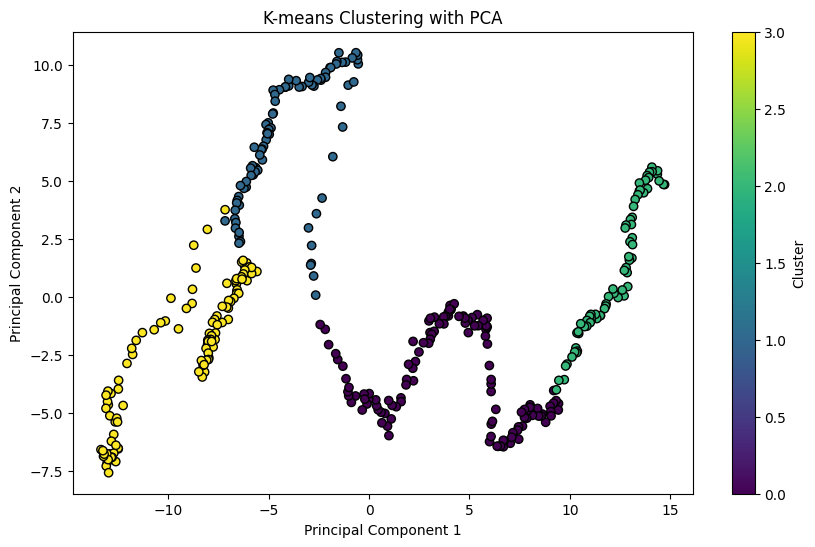

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

/Users/justincase/PycharmProjects/FINANCE 781/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/justincase/PycharmProjects/FINANCE 781/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/justincase/PycharmProjects/FINANCE 781/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/justincase/PycharmProjects/FINANCE 781/.venv/lib/python3.

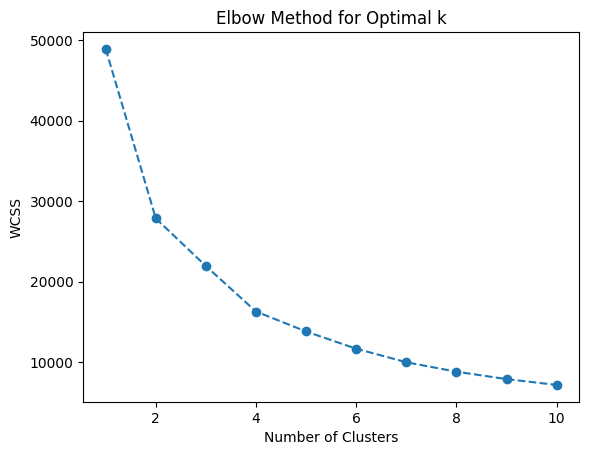

In [24]:
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Things to consider:

* Suggested data transformation `TCODE' should be applied for each series before fitting the model.
* How do the clusters map back to the 8 categories identified in FRED-MD?